In [2]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [50]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

## Changing the format of BareNuc to int and gettinf rid of null values 

In [51]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [52]:
class2 = df[df['Class'] == 2][0:]
class2.head()
class4 = df[df['Class'] == 4][0:]
class4.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4


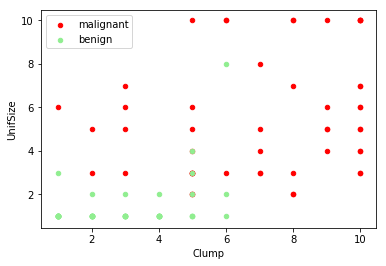

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = class4[0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='RED', label='malignant');
class2[0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='LIGHTGREEN', label='benign', ax =ax);
plt.show()

## Creating X, Y feature set and the Training and Testing data 

In [54]:
X = np.asanyarray(df[['Clump','UnifSize','UnifShape','SingEpiSize','BareNuc','BlandChrom']])
Y = np.asanyarray(df['Class'])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(478, 6) (478,)
(205, 6) (205,)


## Creating and training SVM Classifier model, kernel is polynomial

In [56]:
from sklearn import svm

model_Poly= svm.SVC(kernel = 'poly')

In [57]:
model_Poly.fit(X_train, Y_train)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [58]:
yHat_Poly = model_Poly.predict(X_test)

### Evaluation of model with polynomial kernel

In [59]:
from sklearn.metrics import confusion_matrix
import itertools

In [60]:
def plot_confusion_matrix(CM, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    
    if normalize:
        CM = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix not normalized')
    print(CM)
    
    plt.imshow(CM, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    fmt= '.2f' if normalize else 'd'
    thresh= CM.max() / 2.
    for i, j in itertools.product(range(CM.shape[0]), range(CM.shape[1])) :
        plt.text(j, i, format(CM[i,j], fmt), horizontalalignment= 'center', color= 'white' if CM[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

The Jaccuard Index is 0.926829268292683
The F-1 score
              precision    recall  f1-score   support

           2       0.91      0.98      0.94       128
           4       0.96      0.84      0.90        77

   micro avg       0.93      0.93      0.93       205
   macro avg       0.93      0.91      0.92       205
weighted avg       0.93      0.93      0.93       205

Confusion matrix not normalized
[[125   3]
 [ 12  65]]


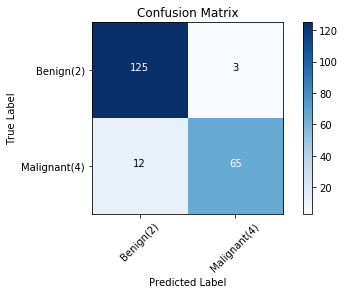

In [61]:
from sklearn import metrics

print('The Jaccuard Index is', metrics.jaccard_similarity_score(Y_test, yHat_Poly))
cnfM = confusion_matrix(Y_test, yHat_Poly, labels= [2,4])
np.set_printoptions(precision= 2)

print('The F-1 score')
print(metrics.classification_report(Y_test, yHat_Poly))

plt.figure()
plot_confusion_matrix(cnfM, classes=['Benign(2)', 'Malignant(4)'], normalize= False, title= 'Confusion Matrix')

## SVM Classifier Model, kernel = sigmoid 

In [62]:
model_Sig = svm.SVC(kernel = 'sigmoid')
model_Sig.fit(X_train, Y_train)
yHat_Sig = model_Sig.predict(X_test)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation of model with sigmoid kernel 

Jaccuard Index: 0.35609756097560974
The F-1 score
              precision    recall  f1-score   support

           2       0.49      0.57      0.53       128
           4       0.00      0.00      0.00        77

   micro avg       0.36      0.36      0.36       205
   macro avg       0.24      0.29      0.26       205
weighted avg       0.30      0.36      0.33       205

Confusion matrix not normalized
[[73 55]
 [77  0]]


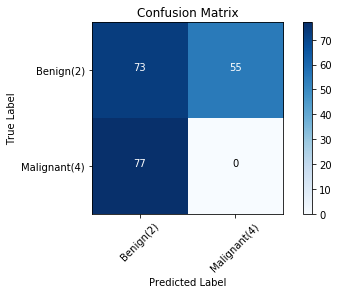

In [63]:
print('Jaccuard Index:', metrics.jaccard_similarity_score(Y_test, yHat_Sig))

cnfM = confusion_matrix(Y_test, yHat_Sig, labels= [2,4])
np.set_printoptions(precision= 2)

print('The F-1 score')
print(metrics.classification_report(Y_test, yHat_Sig))

plt.figure()
plot_confusion_matrix(cnfM, classes=['Benign(2)', 'Malignant(4)'], normalize= False, title= 'Confusion Matrix')

## SVM Classifier model with kernel = radial basis function 

In [64]:
model_rbf = svm.SVC(kernel = 'rbf')
model_rbf.fit(X_train, Y_train)
yHat_rbf = model_rbf.predict(X_test)

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evalution of model with rbf kernel 

The Jaccuard Index: 0.9512195121951219
The F-1 score
              precision    recall  f1-score   support

           2       0.97      0.95      0.96       128
           4       0.92      0.95      0.94        77

   micro avg       0.95      0.95      0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Confusion matrix not normalized
[[122   6]
 [  4  73]]


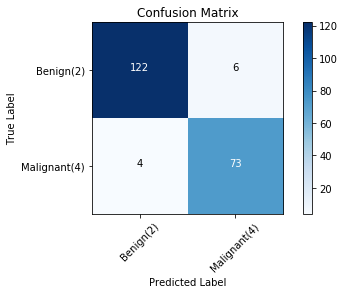

In [65]:
cnf= confusion_matrix(Y_test, yHat_rbf, labels = [2,4])
np.set_printoptions(precision= 2)

print('The Jaccuard Index:', metrics.jaccard_similarity_score(Y_test, yHat_rbf))
print('The F-1 score')
print(metrics.classification_report(Y_test, yHat_rbf))
plt.figure()
plot_confusion_matrix(cnf, classes= ['Benign(2)','Malignant(4)'], normalize= False, title= 'Confusion Matrix')

# The SVM Classifier model with  radial basis function is the most accurate model for our dataset